In [3]:
import random
import numpy as np
import pandas as pd
import time
import matplotlib as plt

def pick_weekly_topic():
    topics = np.random.choice( 350, 6, replace=False ).tolist() 
    #generate 6 random topics
    #first 5 are the user's topics, last one is the random one
    if topics[ -1 ] * 2 <= ( 350 * 2 * .05 ): 
        return topics[ -1 ]
    else:
        return topics[ -2 ]
    
def iter_topics( topics ):
    wt = pick_weekly_topic()
    topics = topics[ 1: ] + [ wt ]
    return topics

def instantiate_topics( topics = [] ):
    for i in range( 3 ):
        topics.append( pick_weekly_topic() )
    return topics

topics = instantiate_topics( )
topics_permutations_counts = {}
topics_permutations = {}
topics_permutations[ tuple( topics ) ] = 1
#time stuff
start_time = time.time()
last_run = start_time

for j in range( 1000 ):
    if j % 100 == 0:
        print( j )
        print( "--- %s seconds ---" % (time.time() - last_run ) )
        last_run = time.time()
    for i in range( 1000000 ):
        topics = iter_topics( topics )
        if tuple( topics ) not in topics_permutations:
            topics_permutations[ tuple( topics ) ] = 1
        else:
            topics_permutations[ tuple( topics ) ] += 1

    if len( topics_permutations ) not in topics_permutations_counts:
        topics_permutations_counts[ len( topics_permutations ) ] = 1
    else:
        topics_permutations_counts[ len( topics_permutations ) ] += 1

0
--- 0.00013589859008789062 seconds ---
100
--- 902.6361699104309 seconds ---
200
--- 917.2868378162384 seconds ---
300
--- 935.6592018604279 seconds ---
400
--- 929.4806790351868 seconds ---
500
--- 934.3093750476837 seconds ---
600
--- 947.1886310577393 seconds ---
700
--- 931.6137390136719 seconds ---
800
--- 937.529797077179 seconds ---
900
--- 3659.869528770447 seconds ---


array([[<AxesSubplot:title={'center':'permutations'}>]], dtype=object)

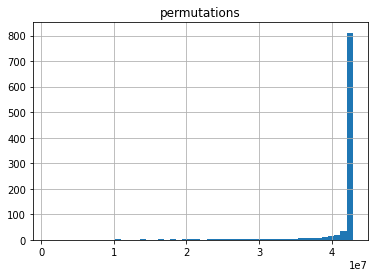

In [4]:
perms = [ perm for perm_sublist in [ [ key ] * value for key, value in topics_permutations_counts.items() ] for perm in perm_sublist ]
perms = pd.DataFrame( perms, columns=['permutations'] )
perms.hist(bins=50)

In [7]:
#the permutations
print( perms )
print( perms[ 'permutations'].mean() )

     permutations
0          986577
1         1946952
2         2882204
3         3793110
4         4679818
..            ...
995      42875000
996      42875000
997      42875000
998      42875000
999      42875000

[1000 rows x 1 columns]
40908224.345
